# Import and Warehouse data

In [1]:
import pandas as pd

In [2]:
import mysql.connector as msql

In [3]:
conn= msql.connect(
    host='localhost',
    database='Telecom',
    user='root',
    password='Password123'  
    )

In [4]:
query1=" Select * from telcomcustomer_churn_1"

In [5]:
query2=" Select * from telcomcustomer_churn_2"

In [6]:
df1 = pd.read_sql(query1, conn)

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
df2 = pd.read_sql(query2, conn)

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [9]:
df2

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
df = pd.merge(df1,df2,on='customerID')

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df1.shape

(7043, 10)

# Data cleansing and Exploratory data analysis

In [15]:
df.isna().sum()/df.shape[0]*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [16]:
duplicate = df[df.duplicated()]

In [17]:
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df=df.drop(['PaymentMethod'], axis=1)

In [20]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,74.40,306.60,Yes


In [21]:
df=df.drop(['PaperlessBilling'], axis=1)

In [22]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [23]:
gender = pd.get_dummies(df["gender"]) 

In [24]:
gender

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,0,1


In [25]:
df=pd.concat([df, gender], axis=1)

In [26]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,Female,Male
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,29.85,29.85,No,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,56.95,1889.50,No,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,53.85,108.15,Yes,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,42.30,1840.75,No,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,70.70,151.65,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,103.20,7362.90,No,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,29.60,346.45,No,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,74.40,306.60,Yes,0,1


In [27]:
df=df.drop(['gender'], axis=1)

In [28]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,Female,Male
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No,1,0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No,0,1
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes,0,1
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No,0,1
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No,0,1
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No,1,0
7040,4801-JZAZL,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No,1,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes,0,1


In [29]:
Contract = pd.get_dummies(df["Contract"])
Contract

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,1,0
7039,0,1,0
7040,1,0,0
7041,1,0,0


In [30]:
df=pd.concat([df, Contract], axis=1)
df=df.drop(['Contract'], axis=1)
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn,Female,Male,Month-to-month,One year,Two year
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,29.85,29.85,No,1,0,1,0,0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,56.95,1889.50,No,0,1,0,1,0
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,53.85,108.15,Yes,0,1,1,0,0
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,42.30,1840.75,No,0,1,0,1,0
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,70.70,151.65,Yes,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,84.80,1990.50,No,0,1,0,1,0
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,103.20,7362.90,No,1,0,0,1,0
7040,4801-JZAZL,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,29.60,346.45,No,1,0,1,0,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,74.40,306.60,Yes,0,1,1,0,0


In [31]:
InternetService = pd.get_dummies(df["InternetService"])
InternetService

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [32]:
InternetService=InternetService.rename(columns={'No':'NoInternetService'})
InternetService

,DSL,Fiber optic,NoInternetService
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [33]:
df=pd.concat([df, InternetService], axis=1)
df=df.drop(['InternetService'], axis=1)
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,Female,Male,Month-to-month,One year,Two year,DSL,Fiber optic,NoInternetService
0,7590-VHVEG,0,Yes,No,1,No,No phone service,No,Yes,No,...,29.85,No,1,0,1,0,0,1,0,0
1,5575-GNVDE,0,No,No,34,Yes,No,Yes,No,Yes,...,1889.50,No,0,1,0,1,0,1,0,0
2,3668-QPYBK,0,No,No,2,Yes,No,Yes,Yes,No,...,108.15,Yes,0,1,1,0,0,1,0,0
3,7795-CFOCW,0,No,No,45,No,No phone service,Yes,No,Yes,...,1840.75,No,0,1,0,1,0,1,0,0
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,...,151.65,Yes,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,1990.50,No,0,1,0,1,0,1,0,0
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,7362.90,No,1,0,0,1,0,0,1,0
7040,4801-JZAZL,0,Yes,Yes,11,No,No phone service,Yes,No,No,...,346.45,No,1,0,1,0,0,1,0,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,No,No,No,...,306.60,Yes,0,1,1,0,0,0,1,0


In [34]:
Churn = pd.get_dummies(df["Churn"])
Churn=Churn.rename(columns={'No':'NoChurn','Yes':'YesChurn'})
Churn

,NoChurn,YesChurn
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


In [35]:
df=pd.concat([df, Churn], axis=1)
df=df.drop(['Churn'], axis=1)
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Female,Male,Month-to-month,One year,Two year,DSL,Fiber optic,NoInternetService,NoChurn,YesChurn
0,7590-VHVEG,0,Yes,No,1,No,No phone service,No,Yes,No,...,1,0,1,0,0,1,0,0,1,0
1,5575-GNVDE,0,No,No,34,Yes,No,Yes,No,Yes,...,0,1,0,1,0,1,0,0,1,0
2,3668-QPYBK,0,No,No,2,Yes,No,Yes,Yes,No,...,0,1,1,0,0,1,0,0,0,1
3,7795-CFOCW,0,No,No,45,No,No phone service,Yes,No,Yes,...,0,1,0,1,0,1,0,0,1,0
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,0,1,0,1,0,1,0,0,1,0
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,1,0,0,1,0,0,1,0,1,0
7040,4801-JZAZL,0,Yes,Yes,11,No,No phone service,Yes,No,No,...,1,0,1,0,0,1,0,0,1,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,No,No,No,...,0,1,1,0,0,0,1,0,0,1


In [36]:
Partner = pd.get_dummies(df["Partner"])
Partner=Partner.rename(columns={'No':'NoPartner','Yes':'YesPartner'})
Partner

,NoPartner,YesPartner
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,0,1
7041,0,1


In [37]:
df=pd.concat([df, Partner], axis=1)
df=df.drop(['Partner'], axis=1)
df

,customerID,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Month-to-month,One year,Two year,DSL,Fiber optic,NoInternetService,NoChurn,YesChurn,NoPartner,YesPartner
0,7590-VHVEG,0,No,1,No,No phone service,No,Yes,No,No,...,1,0,0,1,0,0,1,0,0,1
1,5575-GNVDE,0,No,34,Yes,No,Yes,No,Yes,No,...,0,1,0,1,0,0,1,0,1,0
2,3668-QPYBK,0,No,2,Yes,No,Yes,Yes,No,No,...,1,0,0,1,0,0,0,1,1,0
3,7795-CFOCW,0,No,45,No,No phone service,Yes,No,Yes,Yes,...,0,1,0,1,0,0,1,0,1,0
4,9237-HQITU,0,No,2,Yes,No,No,No,No,No,...,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,24,Yes,Yes,Yes,No,Yes,Yes,...,0,1,0,1,0,0,1,0,0,1
7039,2234-XADUH,0,Yes,72,Yes,Yes,No,Yes,Yes,No,...,0,1,0,0,1,0,1,0,0,1
7040,4801-JZAZL,0,Yes,11,No,No phone service,Yes,No,No,No,...,1,0,0,1,0,0,1,0,0,1
7041,8361-LTMKD,1,No,4,Yes,Yes,No,No,No,No,...,1,0,0,0,1,0,0,1,0,1


In [38]:
TechSupport = pd.get_dummies(df["TechSupport"])
TechSupport=TechSupport.rename(columns={'No':'NoTechSupport','Yes':'YesTechSupport'})
TechSupport

,NoTechSupport,No internet service,YesTechSupport
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7038,0,0,1
7039,1,0,0
7040,1,0,0
7041,1,0,0


In [39]:
df=pd.concat([df, TechSupport], axis=1)
df=df.drop(['TechSupport'], axis=1)
df

,customerID,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,...,DSL,Fiber optic,NoInternetService,NoChurn,YesChurn,NoPartner,YesPartner,NoTechSupport,No internet service,YesTechSupport
0,7590-VHVEG,0,No,1,No,No phone service,No,Yes,No,No,...,1,0,0,1,0,0,1,1,0,0
1,5575-GNVDE,0,No,34,Yes,No,Yes,No,Yes,No,...,1,0,0,1,0,1,0,1,0,0
2,3668-QPYBK,0,No,2,Yes,No,Yes,Yes,No,No,...,1,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,No,45,No,No phone service,Yes,No,Yes,No,...,1,0,0,1,0,1,0,0,0,1
4,9237-HQITU,0,No,2,Yes,No,No,No,No,No,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,24,Yes,Yes,Yes,No,Yes,Yes,...,1,0,0,1,0,0,1,0,0,1
7039,2234-XADUH,0,Yes,72,Yes,Yes,No,Yes,Yes,Yes,...,0,1,0,1,0,0,1,1,0,0
7040,4801-JZAZL,0,Yes,11,No,No phone service,Yes,No,No,No,...,1,0,0,1,0,0,1,1,0,0
7041,8361-LTMKD,1,No,4,Yes,Yes,No,No,No,No,...,0,1,0,0,1,0,1,1,0,0


In [40]:
OnlineSecurity = pd.get_dummies(df["OnlineSecurity"])
OnlineSecurity=OnlineSecurity.rename(columns={'No':'NoOnlineSecurity','Yes':'YesOnlineSecurity'})
df=pd.concat([df, OnlineSecurity], axis=1)
df=df.drop(['OnlineSecurity'], axis=1)

In [41]:
df

,customerID,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,...,NoChurn,YesChurn,NoPartner,YesPartner,NoTechSupport,No internet service,YesTechSupport,NoOnlineSecurity,No internet service,YesOnlineSecurity
0,7590-VHVEG,0,No,1,No,No phone service,Yes,No,No,No,...,1,0,0,1,1,0,0,1,0,0
1,5575-GNVDE,0,No,34,Yes,No,No,Yes,No,No,...,1,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,No,2,Yes,No,Yes,No,No,No,...,0,1,1,0,1,0,0,0,0,1
3,7795-CFOCW,0,No,45,No,No phone service,No,Yes,No,No,...,1,0,1,0,0,0,1,0,0,1
4,9237-HQITU,0,No,2,Yes,No,No,No,No,No,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,24,Yes,Yes,No,Yes,Yes,Yes,...,1,0,0,1,0,0,1,0,0,1
7039,2234-XADUH,0,Yes,72,Yes,Yes,Yes,Yes,Yes,Yes,...,1,0,0,1,1,0,0,1,0,0
7040,4801-JZAZL,0,Yes,11,No,No phone service,No,No,No,No,...,1,0,0,1,1,0,0,0,0,1
7041,8361-LTMKD,1,No,4,Yes,Yes,No,No,No,No,...,0,1,0,1,1,0,0,1,0,0


In [42]:
DeviceProtection = pd.get_dummies(df["DeviceProtection"])
DeviceProtection=DeviceProtection.rename(columns={'No':'NoDeviceProtection','Yes':'YesDeviceProtection'})
df=pd.concat([df, DeviceProtection], axis=1)
df=df.drop(['DeviceProtection'], axis=1)  


In [43]:
StreamingTV = pd.get_dummies(df["StreamingTV"])
StreamingTV=StreamingTV.rename(columns={'No':'StreamingTV','Yes':'StreamingTV'})
df=pd.concat([df, StreamingTV], axis=1)
df=df.drop(['StreamingTV'], axis=1) 

StreamingMovies = pd.get_dummies(df["StreamingMovies"])
StreamingMovies=StreamingMovies.rename(columns={'No':'StreamingMovies','Yes':'StreamingMovies'})
df=pd.concat([df, StreamingMovies], axis=1)
df=df.drop(['StreamingMovies'], axis=1) 



In [44]:
df.columns

Index(['customerID', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineBackup', 'MonthlyCharges', 'TotalCharges',
       'Female', 'Male', 'Month-to-month', 'One year', 'Two year', 'DSL',
       'Fiber optic', 'NoInternetService', 'NoChurn', 'YesChurn', 'NoPartner',
       'YesPartner', 'NoTechSupport', 'No internet service', 'YesTechSupport',
       'NoOnlineSecurity', 'No internet service', 'YesOnlineSecurity',
       'NoDeviceProtection', 'No internet service', 'YesDeviceProtection',
       'No internet service', 'No internet service'],
      dtype='object')

In [45]:
df

,customerID,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,MonthlyCharges,TotalCharges,Female,...,No internet service,YesTechSupport,NoOnlineSecurity,No internet service,YesOnlineSecurity,NoDeviceProtection,No internet service,YesDeviceProtection,No internet service,No internet service
0,7590-VHVEG,0,No,1,No,No phone service,Yes,29.85,29.85,1,...,0,0,1,0,0,1,0,0,0,0
1,5575-GNVDE,0,No,34,Yes,No,No,56.95,1889.50,0,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,No,2,Yes,No,Yes,53.85,108.15,0,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0,No,45,No,No phone service,No,42.30,1840.75,0,...,0,1,0,0,1,0,0,1,0,0
4,9237-HQITU,0,No,2,Yes,No,No,70.70,151.65,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,24,Yes,Yes,No,84.80,1990.50,0,...,0,1,0,0,1,0,0,1,0,0
7039,2234-XADUH,0,Yes,72,Yes,Yes,Yes,103.20,7362.90,1,...,0,0,1,0,0,0,0,1,0,0
7040,4801-JZAZL,0,Yes,11,No,No phone service,No,29.60,346.45,1,...,0,0,0,0,1,1,0,0,0,0
7041,8361-LTMKD,1,No,4,Yes,Yes,No,74.40,306.60,0,...,0,0,1,0,0,1,0,0,0,0


In [46]:
PhoneService = pd.get_dummies(df["PhoneService"])
PhoneService=PhoneService.rename(columns={'No':'NoPhoneService','Yes':'YesPhoneService'})
df=pd.concat([df, PhoneService], axis=1)
df=df.drop(['PhoneService'], axis=1)

MultipleLines = pd.get_dummies(df["MultipleLines"])
MultipleLines=MultipleLines.rename(columns={'No':'NoMultipleLines','Yes':'YesMultipleLines'})
df=pd.concat([df, MultipleLines], axis=1)
df=df.drop(['MultipleLines'], axis=1)

In [47]:
df

,customerID,SeniorCitizen,Dependents,tenure,OnlineBackup,MonthlyCharges,TotalCharges,Female,Male,Month-to-month,...,NoDeviceProtection,No internet service,YesDeviceProtection,No internet service,No internet service,NoPhoneService,YesPhoneService,NoMultipleLines,No phone service,YesMultipleLines
0,7590-VHVEG,0,No,1,Yes,29.85,29.85,1,0,1,...,1,0,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,No,34,No,56.95,1889.50,0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,0,No,2,Yes,53.85,108.15,0,1,1,...,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,No,45,No,42.30,1840.75,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,9237-HQITU,0,No,2,No,70.70,151.65,1,0,1,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,24,No,84.80,1990.50,0,1,0,...,0,0,1,0,0,0,1,0,0,1
7039,2234-XADUH,0,Yes,72,Yes,103.20,7362.90,1,0,0,...,0,0,1,0,0,0,1,0,0,1
7040,4801-JZAZL,0,Yes,11,No,29.60,346.45,1,0,1,...,1,0,0,0,0,1,0,0,1,0
7041,8361-LTMKD,1,No,4,No,74.40,306.60,0,1,1,...,1,0,0,0,0,0,1,0,0,1


In [48]:
OnlineBackup = pd.get_dummies(df["OnlineBackup"])
OnlineBackup=OnlineBackup.rename(columns={'No':'NoOnlineBackup','Yes':'YesOnlineBackup'})
df=pd.concat([df, OnlineBackup], axis=1)
df=df.drop(['OnlineBackup'], axis=1)

In [49]:
df

,customerID,SeniorCitizen,Dependents,tenure,MonthlyCharges,TotalCharges,Female,Male,Month-to-month,One year,...,No internet service,No internet service,NoPhoneService,YesPhoneService,NoMultipleLines,No phone service,YesMultipleLines,NoOnlineBackup,No internet service,YesOnlineBackup
0,7590-VHVEG,0,No,1,29.85,29.85,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,5575-GNVDE,0,No,34,56.95,1889.50,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,3668-QPYBK,0,No,2,53.85,108.15,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3,7795-CFOCW,0,No,45,42.30,1840.75,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
4,9237-HQITU,0,No,2,70.70,151.65,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,24,84.80,1990.50,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
7039,2234-XADUH,0,Yes,72,103.20,7362.90,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
7040,4801-JZAZL,0,Yes,11,29.60,346.45,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
7041,8361-LTMKD,1,No,4,74.40,306.60,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0


In [52]:
Dependents = pd.get_dummies(df["Dependents"])
Dependents=Dependents.rename(columns={'No':'NoDependents','Yes':'YesDependents'})
df=pd.concat([df, Dependents], axis=1)
df=df.drop(['Dependents'], axis=1)

In [53]:
df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Male,Month-to-month,One year,Two year,...,NoPhoneService,YesPhoneService,NoMultipleLines,No phone service,YesMultipleLines,NoOnlineBackup,No internet service,YesOnlineBackup,NoDependents,YesDependents
0,7590-VHVEG,0,1,29.85,29.85,1,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,0,...,0,1,1,0,0,0,0,1,1,0
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
7040,4801-JZAZL,0,11,29.60,346.45,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
7041,8361-LTMKD,1,4,74.40,306.60,0,1,1,0,0,...,0,1,0,0,1,1,0,0,1,0


In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Male,Month-to-month,One year,Two year,DSL,...,NoPhoneService,YesPhoneService,NoMultipleLines,No phone service,YesMultipleLines,NoOnlineBackup,No internet service,YesOnlineBackup,NoDependents,YesDependents
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.495244,0.504756,0.550192,0.209144,0.240664,0.343746,...,0.096834,0.903166,0.481329,0.096834,0.421837,0.438450,0.216669,0.344881,0.700412,0.299588
std,0.368612,24.559481,30.090047,2266.794470,0.500013,0.500013,0.497510,0.406726,0.427517,0.474991,...,0.295752,0.295752,0.499687,0.295752,0.493888,0.496232,0.412004,0.475363,0.458110,0.458110
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df['YesChurn'].describe()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesChurn, dtype: float64

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

<AxesSubplot:ylabel='Frequency'>

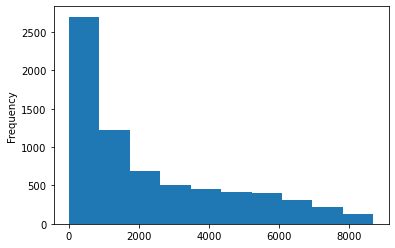

In [57]:
df['TotalCharges'].plot(kind='hist')

Majority of Total Charge are low

<AxesSubplot:ylabel='Frequency'>

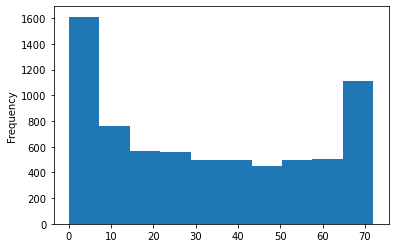

In [58]:
df['tenure'].plot(kind='hist')

Majority of Churned out customers are short term Customers

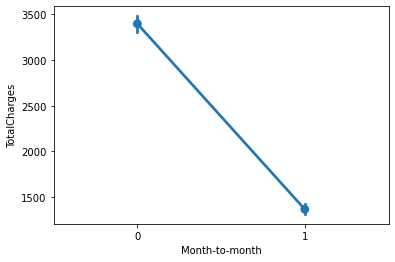

In [59]:
sns.pointplot(x=df['Month-to-month'], y=df['TotalCharges'])
plt.show()

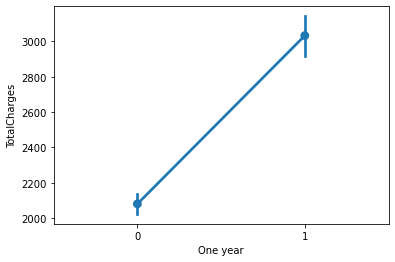

In [60]:
sns.pointplot(x=df['One year'], y=df['TotalCharges'])
plt.show()

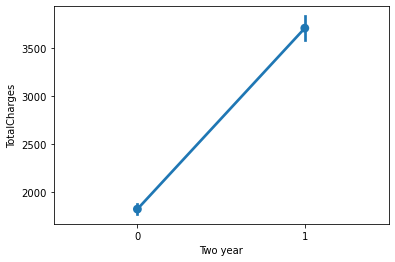

In [61]:
sns.pointplot(x=df['Two year'], y=df['TotalCharges'])
plt.show()

In [62]:
corr_matrix =df[['MonthlyCharges',
       'TotalCharges', 'Female', 'Male', 'Month-to-month', 'One year',
       'Two year', 'DSL', 'Fiber optic', 'NoInternetService', 'NoChurn',
       'YesChurn', 'NoPartner', 'YesPartner', 'NoTechSupport',
       'No internet service', 'YesTechSupport', 'NoOnlineSecurity',
       'No internet service', 'YesOnlineSecurity', 'NoOnlineSecurity',
       'No internet service', 'YesOnlineSecurity', 'NoDependents',
       'YesDependents', 'NoPhoneService', 'YesPhoneService', 'NoMultipleLines',
       'No phone service', 'YesMultipleLines', 'NoDeviceProtection',
       'No internet service', 'YesDeviceProtection', 'No internet service',
       'No internet service']].corr()

In [63]:
corr_matrix

,MonthlyCharges,TotalCharges,Female,Male,Month-to-month,One year,Two year,DSL,Fiber optic,NoInternetService,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
MonthlyCharges,1.000000,0.651174,0.014569,-0.014569,0.060165,0.004904,-0.074681,-0.160189,0.787066,-0.763557,...,-0.763557,-0.763557,-0.763557,-0.763557,-0.763557,-0.763557,-0.763557,-0.763557,-0.763557,-0.763557
TotalCharges,0.651174,1.000000,0.000080,-0.000080,-0.444255,0.170814,0.354481,-0.052469,0.361655,-0.375223,...,-0.375223,-0.375223,-0.375223,-0.375223,-0.375223,-0.375223,-0.375223,-0.375223,-0.375223,-0.375223
Female,0.014569,0.000080,1.000000,-1.000000,0.003386,-0.008026,0.003695,-0.006568,0.011286,-0.006026,...,-0.006026,-0.006026,-0.006026,-0.006026,-0.006026,-0.006026,-0.006026,-0.006026,-0.006026,-0.006026
Male,-0.014569,-0.000080,-1.000000,1.000000,-0.003386,0.008026,-0.003695,0.006568,-0.011286,0.006026,...,0.006026,0.006026,0.006026,0.006026,0.006026,0.006026,0.006026,0.006026,0.006026,0.006026
Month-to-month,0.060165,-0.444255,0.003386,-0.003386,1.000000,-0.568744,-0.622633,-0.065509,0.244164,-0.218639,...,-0.218639,-0.218639,-0.218639,-0.218639,-0.218639,-0.218639,-0.218639,-0.218639,-0.218639,-0.218639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
No internet service,-0.763557,-0.375223,-0.006026,0.006026,-0.218639,0.038004,0.218278,-0.380635,-0.465793,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
No internet service,-0.763557,-0.375223,-0.006026,0.006026,-0.218639,0.038004,0.218278,-0.380635,-0.465793,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
No internet service,-0.763557,-0.375223,-0.006026,0.006026,-0.218639,0.038004,0.218278,-0.380635,-0.465793,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
No internet service,-0.763557,-0.375223,-0.006026,0.006026,-0.218639,0.038004,0.218278,-0.380635,-0.465793,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


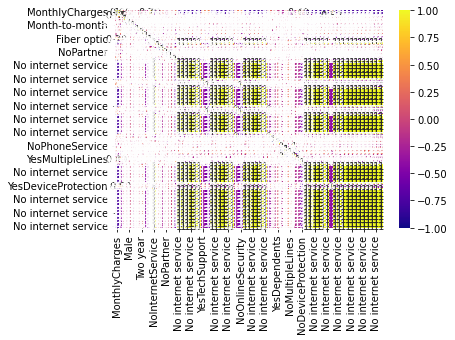

In [64]:
sns.heatmap(corr_matrix,annot=True,cmap='plasma',vmin=-1,vmax=1)
plt.show()

# Data Preparation for model building

In [65]:
df=df.drop(['customerID'], axis=1)

In [66]:
X = df.drop('YesChurn',axis=1)
Y = df['YesChurn']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [68]:
ss = StandardScaler()

In [71]:
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [73]:
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


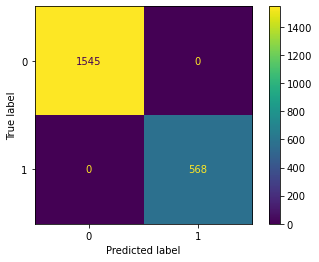

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test)  
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1545
           1       1.00      1.00      1.00       568

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



In [76]:
print('accuracy:',accuracy_score(Y_test,y_pred_gnb))

accuracy: 1.0


# KNN Classification

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [78]:
y_pred_knn = knn.predict(X_test)
y_pred_knn[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


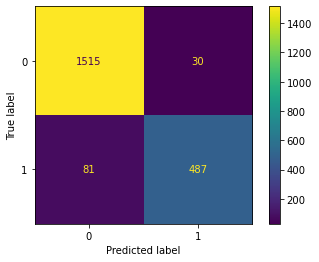

In [79]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1545
           1       0.94      0.86      0.90       568

    accuracy                           0.95      2113
   macro avg       0.95      0.92      0.93      2113
weighted avg       0.95      0.95      0.95      2113



In [81]:
print('accuracy:',accuracy_score(Y_test,y_pred_knn))

accuracy: 0.9474680548982489


## Choosing optimal K value

In [82]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

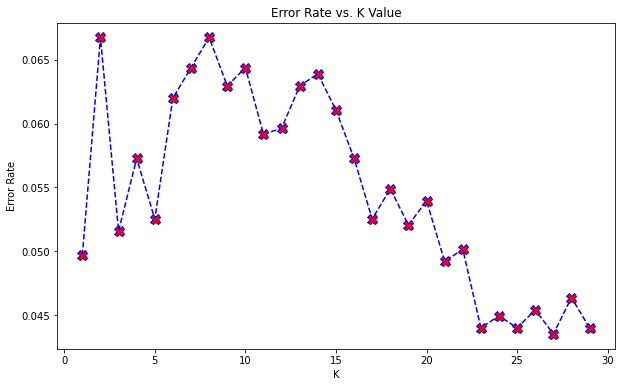

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

From the above plot, we can observe that the error is lowest 3 neigbours, lets build KNN classifier using this K value and compare the accuracy

In [85]:
## Model 2: KNN classfier with optimal K=27
knn_three = KNeighborsClassifier(n_neighbors=27)
knn_three.fit(X_train,Y_train)

## y predicted
y_pred_knn_three = knn_three.predict(X_test)

## accuracy
print('accuracy (k=27):',accuracy_score(Y_test,y_pred_knn_three))

accuracy (k=27): 0.9564600094652154


In [88]:
### Comparison of all the three KNN classification models
print('accuracy (default K):',accuracy_score(Y_test,y_pred_knn))
print('accuracy (k=27)      :',accuracy_score(Y_test,y_pred_knn_three))

accuracy (default K): 0.9474680548982489
accuracy (k=27)      : 0.9564600094652154


## Comparison of Naive Bayes and KNN Classifier models

In [87]:
print('Naive Bayes model - accuracy:',accuracy_score(Y_test,y_pred_gnb))
print('KNN with optimal K - accuracy:',accuracy_score(Y_test,y_pred_knn_three))

Naive Bayes model - accuracy: 1.0
KNN with optimal K - accuracy: 0.9564600094652154


# Conclusion

We can see that with Optimal K Naive Bayes Model is the most Accurate with the least amount of error. Hence the Choice of Model here should be Naive Bayes model. KNN is also very accurate, but Naive Bayes has slight edge in terms of the accuracy. WE can also see that on slecting the optimal K, the accuracy of the model increases. Hence choosing the value of K is extremely important.